# **Tourism Recommendation System**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

## Upload and Loading Data

In [ ]:
# Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
# !pip install google-colab
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
#link = 'https://drive.google.com/file/d/1aAMG28cyow5leAO8ZJtj8TYm7seLQcU7/view?usp=sharing'

In [ ]:
# downloaded = drive.CreateFile({'id':'1aAMG28cyow5leAO8ZJtj8TYm7seLQcU7'}) 
# downloaded.GetContentFile('tourism_filtering.csv')  

In [ ]:
# dataset = pd.read_csv('tourism_filtering.csv')
dataset = pd.read_csv(r'Path where the CSV file is stored\tourism_filtering.csv')

In [ ]:
dataset.head()

,Place_Id,Tourist_Id,Rating
0,1,1,4.2
1,1,2,4.5
2,1,3,4.5
3,1,4,4.5
4,1,5,4.4


In [ ]:
dataset.shape

(9800, 3)

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
train.head()

,Place_Id,Tourist_Id,Rating
3984,200,145,4.7
4824,242,25,3.9
1414,71,135,4.5
540,28,221,5.0
6522,327,123,3.3


In [ ]:
test.head()

,Place_Id,Tourist_Id,Rating
532,27,213,3.3
872,44,233,5.0
1149,58,190,3.7
2287,115,48,3.3
4038,202,199,4.5


In [ ]:
n_tourists = len(dataset.Tourist_Id.unique())
n_tourists

320

In [ ]:
n_places = len(dataset.Place_Id.unique())
n_places

490

## Creating Dot Product Model

In [ ]:
# creating place embedding path
place_input = Input(shape=[1], name="Place-Input")
place_embedding = Embedding(n_places+1, 5, name="Place-Embedding")(place_input)
place_vec = Flatten(name="Flatten-Places")(place_embedding)

# creating tourist embedding path
tourist_input = Input(shape=[1], name="Tourist-Input")
tourist_embedding = Embedding(n_tourists+1, 5, name="User-Embedding")(tourist_input)
tourist_vec = Flatten(name="Flatten-Tourists")(tourist_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([place_vec, tourist_vec])
model = Model([tourist_input, place_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/30
245/245 [==============================] - 1s 2ms/step - loss: 16.7790
Epoch 2/30
245/245 [==============================] - 0s 2ms/step - loss: 16.6365
Epoch 3/30
245/245 [==============================] - 0s 2ms/step - loss: 15.8290
Epoch 4/30
245/245 [==============================] - 0s 2ms/step - loss: 14.0598
Epoch 5/30
245/245 [==============================] - 0s 2ms/step - loss: 11.6500
Epoch 6/30
245/245 [==============================] - 0s 2ms/step - loss: 9.0495
Epoch 7/30
245/245 [==============================] - 0s 2ms/step - loss: 6.6036
Epoch 8/30
245/245 [==============================] - 0s 2ms/step - loss: 4.5162
Epoch 9/30
245/245 [==============================] - 0s 1ms/step - loss: 2.8977
Epoch 10/30
245/245 [==============================] - 0s 2ms/step - loss: 1.7633
Epoch 11/30
245/245 [==============================] - 0s 2ms/step - loss: 1.0501
Epoch 12/30
245/245 [==============================] - 0s 2ms/step - loss: 0.6537
Epoch 13/30
245/245 

Text(0, 0.5, 'Training Error')

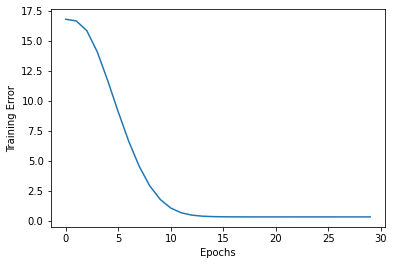

In [ ]:
history = model.fit([train.Tourist_Id, train.Place_Id], train.Rating, epochs=30, verbose=1)
model.save('recommendation_model.h5')
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
model.evaluate([test.Tourist_Id, test.Place_Id], test.Rating)

62/62 [==============================] - 0s 2ms/step - loss: 0.3844


0.3844038248062134

## Creating Neural Network Model

In [ ]:
# creating place embedding path
place_input = Input(shape=[1], name="Place-Input")
place_embedding = Embedding(n_places+1, 5, name="Place-Embedding")(place_input)
place_vec = Flatten(name="Flatten-Places")(place_embedding)

# creating user embedding path
tourist_input = Input(shape=[1], name="Tourist-Input")
tourist_embedding = Embedding(n_tourists+1, 5, name="Tourist-Embedding")(tourist_input)
tourist_vec = Flatten(name="Flatten-Tourist")(tourist_embedding)

# concatenate features
conc = Concatenate()([place_vec, tourist_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([tourist_input, place_input], out)
model2.compile('adam', 'mean_squared_error')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Place-Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 Tourist-Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Place-Embedding (Embedding)    (None, 1, 5)         2455        ['Place-Input[0][0]']            
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         1605        ['Tourist-Input[0][0]']          
                                                                                              

Epoch 1/30
245/245 [==============================] - 1s 2ms/step - loss: 2.8204
Epoch 2/30
245/245 [==============================] - 1s 3ms/step - loss: 0.3374
Epoch 3/30
245/245 [==============================] - 1s 5ms/step - loss: 0.3243
Epoch 4/30
245/245 [==============================] - 1s 4ms/step - loss: 0.3190
Epoch 5/30
245/245 [==============================] - 1s 4ms/step - loss: 0.3168
Epoch 6/30
245/245 [==============================] - 1s 5ms/step - loss: 0.3140
Epoch 7/30
245/245 [==============================] - 1s 5ms/step - loss: 0.3151
Epoch 8/30
245/245 [==============================] - 1s 5ms/step - loss: 0.3116
Epoch 9/30
245/245 [==============================] - 1s 4ms/step - loss: 0.3065
Epoch 10/30
245/245 [==============================] - 1s 4ms/step - loss: 0.3029
Epoch 11/30
245/245 [==============================] - 1s 4ms/step - loss: 0.2958
Epoch 12/30
245/245 [==============================] - 1s 4ms/step - loss: 0.2904
Epoch 13/30
245/245 [====

Text(0, 0.5, 'Training Error')

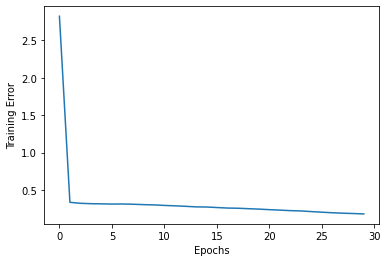

In [ ]:
history = model2.fit([train.Tourist_Id, train.Place_Id], train.Rating, epochs=30, verbose=1)
model2.save('recommendation_model2.h5')
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
model2.evaluate([test.Tourist_Id, test.Place_Id], test.Rating)

62/62 [==============================] - 0s 2ms/step - loss: 0.5134


0.513447642326355

## Predict Recommendation

In [ ]:
# Creating dataset for predict recommendations
place_data = np.array(list(set(dataset.Place_Id)))
place_data[:132]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132])

In [ ]:
tourist_id = 276

tourist = np.array([tourist_id for i in range(len(place_data))])
tourist[:5]

array([276, 276, 276, 276, 276])

In [ ]:
predictions = model.predict([tourist, place_data])

predictions = np.array([a[0] for a in predictions])

recommended_place_ids = (-predictions).argsort()[:5]

recommended_place_ids

array([ 13,  29, 301, 173, 349])

In [ ]:
predictions[recommended_place_ids]

array([4.75848  , 4.255081 , 4.2338367, 4.089696 , 4.081177 ],
      dtype=float32)

In [ ]:
#link = 'https://drive.google.com/file/d/1s9B06Y9txoLqLq0PSHRnXQHuRDW4C6aN/view?usp=sharing'

In [ ]:
downloaded = drive.CreateFile({'id':'1s9B06Y9txoLqLq0PSHRnXQHuRDW4C6aN'}) 
downloaded.GetContentFile('tourism_description.csv')  

In [ ]:
tourism_spot = pd.read_csv('tourism_description.csv')
# tourism_spot = pd.read_csv(r'Path where the CSV file is stored\tourism_description.csv')

In [ ]:
tourism_spot.head()

,Place_Id,Place_Name,Description,Category,City,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,4.4
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,4.5
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,4.4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,4.4


In [ ]:
tourism_spot[tourism_spot['Place_Id'].isin(recommended_place_ids)]

,Place_Id,Place_Name,Description,Category,City,Rating
12,13,Pulau Pramuka,Pulau Pramuka merupakan salah satu pulau yang ...,Bahari,Jakarta,4.2
28,29,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,4.8
172,173,Pantai Nglambor,Pantai Nglambor adalah sebuah pantai eksotis y...,Bahari,Yogyakarta,3.8
300,301,Lereng Anteng Panoramic Coffee Place,Lereng Anteng Panoramic Coffee adalah sebuah t...,Cagar Alam,Bandung,4.1
348,349,Wisata Mangrove Tapak,Wisata hutan mangrove Semarang hampir tak pern...,Cagar Alam,Semarang,3.8
